<a href="https://colab.research.google.com/github/Ryd3n-c/GIREC-/blob/main/Nail_Disease_Detection%2C_Science_Fair_24_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1. Connecting to User's Google Drive
from google.colab import drive
drive.mount('/content/drive')
import os
import random
import shutil

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def get_class_names_from_folder(directory):
  """
  Get the classnames from train folder for example
  """
  import pathlib
  import numpy as np
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names
  return class_names
  print(class_names)

In [ ]:
class_names = get_class_names_from_folder(directory="/content/drive/MyDrive/Nail Diseases Datasets/test/")
class_names

array(['Healthy_test', 'Pitting_test'], dtype='<U12')

In [ ]:
len(class_names)

2

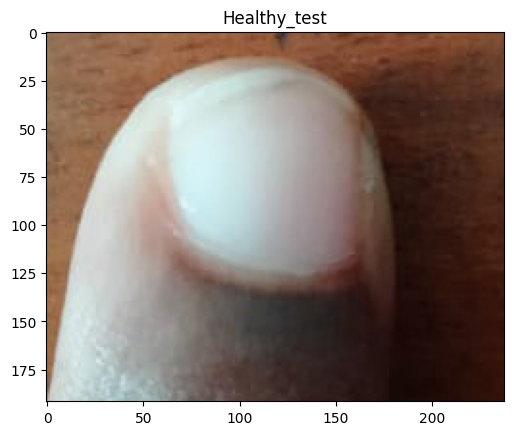

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def visualize_random_image(target_dir, target_class):

  image_dir = target_dir + target_class
  random_image = random.sample(os.listdir(image_dir), 1)

  img = mpimg.imread(image_dir + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)

visualize_random_image("/content/drive/MyDrive/Nail Diseases Datasets/test/","Healthy_test")

In [ ]:
# Import library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    rotation_range=20,        # Rotate images up to 20 degrees
    width_shift_range=0.2,    # Shift width up to 20%
    height_shift_range=0.2,   # Shift height up to 20%
    shear_range=0.1,          # Shear transformation
    zoom_range=0.1,           # Zoom up to 10%
    horizontal_flip=True,     # Flip images horizontally
    vertical_flip=True,       # Flip images vertically
    fill_mode='nearest'        # Fill in missing pixels
)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(directory = "/content/drive/MyDrive/Nail Diseases Datasets/train",
                                               target_size = (240,240),
                                               batch_size = 32,
                                               class_mode = "categorical")
test_data = train_datagen.flow_from_directory(directory = "/content/drive/MyDrive/Nail Diseases Datasets/test/",
                                               target_size = (240,240),
                                               batch_size = 32,
                                               class_mode = "categorical")
val_data = train_datagen.flow_from_directory(directory = "/content/drive/MyDrive/Nail Diseases Datasets/validation/",
                                               target_size = (240,240),
                                               batch_size = 32,
                                               class_mode = "categorical")

Found 560 images belonging to 2 classes.
Found 280 images belonging to 2 classes.
Found 109 images belonging to 2 classes.


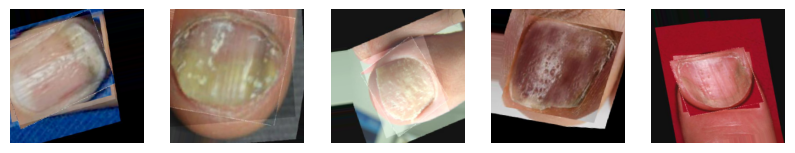

In [51]:
images, labels = next(train_data)

# Plot first 5 images in the batch
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i])  # Display the image
    plt.axis("off")  # Hide axis
plt.show()

Create and fit the model

In [ ]:
# Set random seed
tf.random.set_seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Create the model - 2 Convolutional layers with 2 MaxPool layers
# Number of layers can be adjusted
model = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(240,240,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(2, activation="softmax")
])

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])


In [ ]:
# Fit the model
history = model.fit(train_data,
                    batch_size=32,
                    epochs=20,
                    steps_per_epoch=len(train_data),
                    validation_data=val_data,
                    validation_steps=len(val_data))

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.6801 - loss: 0.8056 - val_accuracy: 0.7706 - val_loss: 0.4423
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8261 - loss: 0.3787 - val_accuracy: 0.8899 - val_loss: 0.3030
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.8541 - loss: 0.3005 - val_accuracy: 0.9174 - val_loss: 0.2379
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8841 - loss: 0.2453 - val_accuracy: 0.8716 - val_loss: 0.2755
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.8994 - loss: 0.2403 - val_accuracy: 0.9358 - val_loss: 0.2171
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8936 - loss: 0.2269 - val_accuracy: 0.8532 - val_loss: 0.2846
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8867 - loss: 0.2257 - val_accuracy: 0.9541 - val_loss: 0.1757
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.9049 - loss: 0.2118 - val_accuracy: 0.8624 - val_loss:

In [ ]:
model.evaluate(test_data)

9/9 ━━━━━━━━━━━━━━━━━━━━ 70s 8s/step - accuracy: 0.9670 - loss: 0.1445


[0.13769476115703583, 0.9642857313156128]

In [ ]:
model.evaluate(val_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9300 - loss: 0.1654


[0.1759537011384964, 0.9266055226325989]

<Axes: >

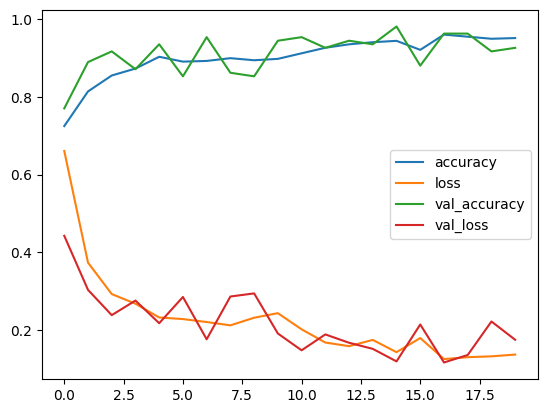

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [26]:
model.save("model.hdf5")

In [28]:
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted class: healthy
Confidence score: 93.88%


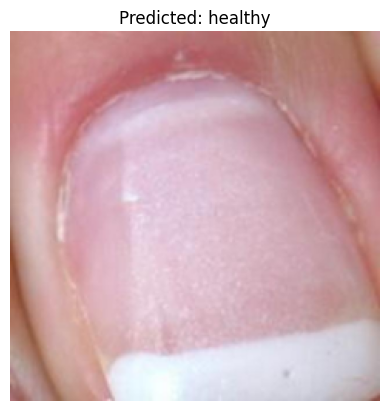

In [53]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

# Define the image path
image_path = '/content/drive/MyDrive/Nail Diseases Datasets/test/Healthy_test/semisuper_kor_690_1746_314_2463_1032_645263_39728452_jpg.rf.365d897ef828ebdf0396df7c78c3ef25.jpg'

# Load the image with PIL
img = Image.open(image_path)

# Resize image to match model input (240x240 pixels as defined in your model)
img_resized = img.resize((240, 240))

# Convert the image to RGB (3 channels)
img_resized = img_resized.convert('RGB')

# Convert the image to a numpy array and normalize it
img_array = img_to_array(img_resized)
img_array = img_array / 255.0  # Normalize pixel values to [0, 1]

# Reshape to include the batch dimension (i.e., (1, 240, 240, 3))
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Load your model
# model = load_model('your_model_path.h5')

# Step 4: Make a prediction
prediction = model.predict(img_array)

# Step 5: Output the predicted class and confidence score
predicted_class_index = np.argmax(prediction, axis=1)[0]

# Get the confidence score (the probability of the predicted class)
confidence_score = np.max(prediction)  # The maximum probability from softmax

# Mapping the predicted index to class names
class_names = {0: "healthy", 1: "nail pitting"}

# Print the predicted class name and confidence score
print(f"Predicted class: {class_names[predicted_class_index]}")
print(f"Confidence score: {confidence_score * 100:.2f}%")

# Step 6: Show the image
plt.imshow(img_resized)
plt.title(f"Predicted: {class_names[predicted_class_index]}")
plt.axis('off')  # Turn off axis
plt.show()
